In [1]:
import tensorflow as tf
import numpy as np
from sklearn import cross_validation

data = np.load('data/data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']
print(train[0])
print(len(labels))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
2790


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def to_onehot(labels,nclasses = 5):
    '''
    Convert labels to "one-hot" format.
    >>> a = [0,1,2,3]
    >>> to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
    '''
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels


In [3]:
labels = to_onehot(labels)
features_train, features_test, labels_train, labels_test = \
    cross_validation.train_test_split(train, labels, test_size=0.2, random_state=42)
sess = tf.InteractiveSession()

In [4]:
features_train[0].shape

(36, 36)

In [5]:
#rquitectura de red
#Entradas y salidas
x = tf.placeholder("float",[None,1296])
y_= tf.placeholder("float",[None,5])

#primera capa
# Hidden layer 1
num_hidden1 = 128
W1 = tf.Variable(tf.truncated_normal([1296,num_hidden1]))
b1 = tf.Variable(tf.constant(0.1,shape=[num_hidden1]))
h1 = tf.sigmoid(tf.matmul(x,W1) + b1)

# Hidden Layer 2
num_hidden2 = 64
W2 = tf.Variable(tf.truncated_normal([num_hidden1,
            num_hidden2]))
b2 = tf.Variable(tf.constant(0.2,shape=[num_hidden2]))
h2 = tf.sigmoid(tf.matmul(h1,W2) + b2)

#Output layer
# Output Layer
W4 = tf.Variable(tf.truncated_normal([num_hidden2,5]))
b4 = tf.Variable(tf.constant(0.1,shape=[5]))
#Softmax
y = tf.nn.softmax(tf.matmul(h2,W4) + b4)#En tensor viejo

In [6]:
#optimización con cross validation y gradient descent
cross_entropy = tf.reduce_mean(
     tf.nn.softmax_cross_entropy_with_logits(logits=y + 1e-50,labels= y_))
train_step = tf.train.GradientDescentOptimizer(0.3).minimize(cross_entropy)

In [7]:
# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [8]:
sess.run(tf.global_variables_initializer())
epochs = 2500
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in range(epochs):
    if i % 10 == 0:  # Record summary data, and the accuracy
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={x: features_train.reshape([-1,1296]), y_: labels_train})
        train_acc[i//10] = A

        # And now the validation set
        A = accuracy.eval(feed_dict={x: features_test.reshape([-1,1296]), y_: labels_test})
        test_acc[i//10] = A
        print("Epoca: "+str(i)+"valor"+str(A))])
    train_step.run(feed_dict={x: features_train.reshape([-1,1296]), y_: labels_train})

Epoca: 0valor0.148746
Epoca: 10valor0.15233
Epoca: 20valor0.16129
Epoca: 30valor0.168459
Epoca: 40valor0.168459
Epoca: 50valor0.168459
Epoca: 60valor0.172043
Epoca: 70valor0.181004
Epoca: 80valor0.184588
Epoca: 90valor0.188172
Epoca: 100valor0.191756
Epoca: 110valor0.198925
Epoca: 120valor0.198925
Epoca: 130valor0.202509
Epoca: 140valor0.207885
Epoca: 150valor0.209677
Epoca: 160valor0.216846
Epoca: 170valor0.222222
Epoca: 180valor0.227599
Epoca: 190valor0.224014
Epoca: 200valor0.227599
Epoca: 210valor0.229391
Epoca: 220valor0.227599
Epoca: 230valor0.232975
Epoca: 240valor0.240143
Epoca: 250valor0.241935
Epoca: 260valor0.247312
Epoca: 270valor0.252688
Epoca: 280valor0.258065
Epoca: 290valor0.263441
Epoca: 300valor0.268817
Epoca: 310valor0.270609
Epoca: 320valor0.274194
Epoca: 330valor0.275986
Epoca: 340valor0.283154
Epoca: 350valor0.290323
Epoca: 360valor0.292115
Epoca: 370valor0.302867
Epoca: 380valor0.301075
Epoca: 390valor0.304659
Epoca: 400valor0.302867
Epoca: 410valor0.304659
Epoca

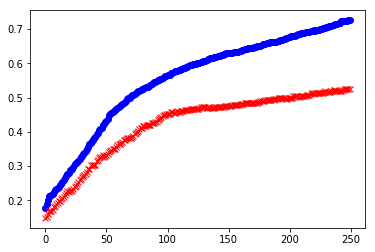

In [9]:
# If you have matplotlib installed
import matplotlib.pyplot as plt
plt.ion()
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

In [10]:
train_acc[-1]

0.72580647468566895

In [11]:
# Save the weights
saver = tf.train.Saver()
saver.save(sess, "mlp.ckpt")

# Restore
saver.restore(sess, "mlp.ckpt")



INFO:tensorflow:Restoring parameters from mlp.ckpt
